<a href="https://colab.research.google.com/github/SajidMajeed92/Data-Structures-Algorithms-with-Python/blob/main/Move_Tail_to_head_in_link_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
You are required to solve the Move Tail to Head problem in a linked list. In this exercise, you are supposed to move the tail (or last) node in a singly linked list to the front of the linked list so that it becomes the new head of the linked list.

For example, in the illustration below, the tail node (D) moves to the start of the linked list and replaces the head node (A).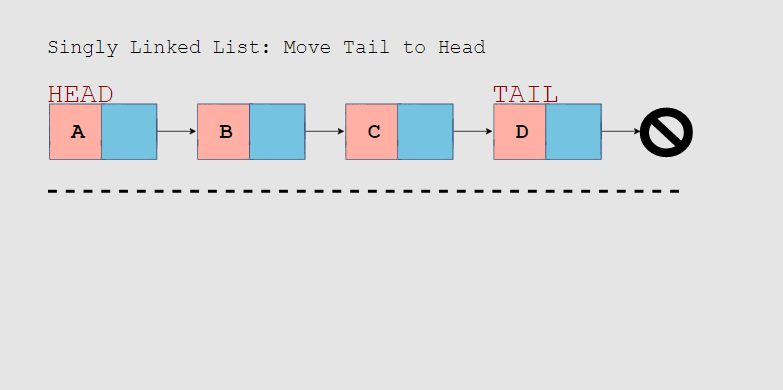```

